In [59]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

### Create a RetinaNet model

In [60]:
model = torchvision.models.detection.retinanet_resnet50_fpn(
    pretrained=False,
    num_classes=10,
    pretrained_backbone=False
)

### Create random image and random boxes

In [61]:
n_boxes = 20
width, height = 224, 224
boxes = torch.randint(low=0, high=180, size=(n_boxes, 4))
boxes[:, 2] = boxes[:, 0] + torch.randint(low=1, high=50, size=(n_boxes,))
boxes[:, 3] = boxes[:, 1] + torch.randint(low=1, high=50, size=(n_boxes,))
labels = torch.randint(low=0, high=10, size=(n_boxes,))

random_image = torch.randint(0, 255, size=(3, width, height)).float()
random_image /= 255.0

# this is the format needed by retinanet
random_image = [random_image]
random_target = [dict(boxes=boxes, labels=labels)]

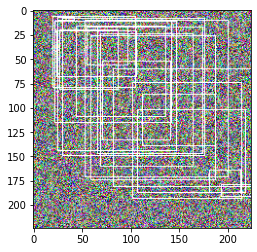

In [65]:
image_with_boxes = torchvision.utils.draw_bounding_boxes(random_image[0].type(torch.uint8), boxes, labels=[""]*n_boxes)
plt.imshow(np.swapaxes(with_boxes.numpy(), 0, -1))

### Forward model with random image

#### At training

In [66]:
model.train()
model(random_image, random_target)

{'classification': tensor(1.1397, grad_fn=<DivBackward0>),
 'bbox_regression': tensor(1.5550, grad_fn=<DivBackward0>)}

#### At inference

In [67]:
model.eval()
model(random_image)

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward>),
  'scores': tensor([], grad_fn=<IndexBackward>),
  'labels': tensor([], dtype=torch.int64)}]